# Analisando a representação construída para o texto das leis

A pergunta central que este notebook se propõe a responder é: as representações que a gente constrói pro texto das leis faz sentido? Como avaliar qual representação é melhor? Uma espécie de teste de sanidade pras representações, ou uma análise exploratória destas representações.

Inicialmente, pensei em duas formas de realizar este teste: visualizando e clusterizando os textos e ver se estes clusters correspondem mais ou menos às categorias das leis; observando se o texto das leis e seu resumo possuem representações similares (ou pelo menos uma relação algébrica clara entre texto e resumo)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importa arquivos
# Descomente pra usar no Google Colab
# from google.colab import files
# import os.path

arq_leis = 'leis.json'

# if (not os.path.isfile(arq_leis)):
#     uploaded = files.upload()

In [3]:
leis = pd.read_json(arq_leis)
leis.drop(['documento'], inplace=True, axis=1)
print(leis.info())
print(leis.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
dtypes: object(4)
memory usage: 188.7+ KB
None
titulo       6033
categoria       8
resumo       4961
texto        6029
dtype: int64


In [29]:
leis = leis.drop(columns=["titulo", "resumo"])
leis

categoria                                              texto  \
0       Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1       Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2       Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3       Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4       Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
...          ...                                                ...   
6028  Resoluções  Faço saber que a Câmara Municipal aprovou e eu...   
6029  Resoluções  A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado...   
6030  Resoluções  A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado...   
6031  Resoluções  A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado...   
6032  Resoluções  A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado...   

                                            texto_limpo  cluster_contagem  \
0     prefeito municipal feira santana estado bahia ...                 3   
1     prefeito municipal feira santana estado bahia ...                 6   
2     prefeito municipal feira santana estado bahia ...                 3   
3     prefeito municipal feira santana estado bahia ...                 6   
4     prefeito municipal feira santana estado bahia ...                 3   
...                                                 ...               ...   
6028  faço saber câmara municipal aprovou qualidade ...                 5   
6029  câmara municipal feira santana estado bahia co...                 5   
6030  câmara municipal feira santana estado bahia co...                 5   
6031  câmara municipal feira santana estado bahia co...                 5   
6032  câmara municipal feira santana estado bahia co...                 5   

      cluster_contagem_normalizada  
0                                6  
1                                6  
2                                6  
3                                6  
4                                6  
...                            ...  
6028                             6  
6029                             6  
6030                             6  
6031                             6  
6032                             6  

[6033 rows x 5 columns]

In [5]:
# Exemplo de texto de lei
leis.loc[len(leis)-1, 'texto']

'A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:\n\nArt. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:\n\n"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.\n\n§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."\n\n"Art. 33 Compete, privativamente, ao Vice-Presidente:"\n\n"Art. 36 ...\n\nI - ...\n\ne) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presiden

# Construindo representações para o texto

In [6]:
from scripts.parsers import limpa_texto
leis['texto_limpo'] = leis['texto'].apply(limpa_texto)

In [7]:
# Constrói matriz de documentos baseado em 
# contagem dos termos por documento
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
representacao_contagem = vectorizer.fit_transform(leis['texto_limpo'])
representacao_contagem

<6033x30209 sparse matrix of type '<class 'numpy.int64'>'
	with 625873 stored elements in Compressed Sparse Row format>

In [8]:
# Construindo representação baseada em TF-IDF
transformer = TfidfTransformer()
representacao_tfidf = transformer.fit_transform(representacao_contagem)
representacao_tfidf

<6033x30209 sparse matrix of type '<class 'numpy.float64'>'
	with 625873 stored elements in Compressed Sparse Row format>

In [9]:
# Construindo representação TF-IDF com normalização 
# (ajuda no SVD)
transformer_normalizado = TfidfTransformer(sublinear_tf=True)
tfidf_normalizado = transformer_normalizado.fit_transform(representacao_contagem)
tfidf_normalizado

<6033x30209 sparse matrix of type '<class 'numpy.float64'>'
	with 625873 stored elements in Compressed Sparse Row format>

In [10]:
# # Construindo representação de palavras
# # baseada na contagem das palavras vizinhas
# # (hipótese linguística distribucional: 
# #  conhecerás as palavras pela companhia que elas têm)

# # Transformar nosso set pra um dicionário de indices
# idx_palavras = {}
# for i, palavra in enumerate(palavras_unicas):
#     idx_palavras[palavra] = i

In [11]:
# # Criando matriz do embedding
# vetores = np.zeros((len(palavras_unicas), len(palavras_unicas)), dtype=np.int16)
# vetores

In [12]:
# # Definir ate qual distancia utilizar
# vizinhanca = 2
# for idx, palavra in enumerate(texto_limpo):
#     for i in range(1, vizinhanca):
#         pal_vizinha = texto_limpo[idx+i]

#         idx_pal = idx_palavras[palavra]
#         idx_vizinha = idx_palavras[pal_vizinha]

#         vetores[idx_pal, idx_vizinha] += 1
#         vetores[idx_vizinha, idx_pal] += 1
#     if (idx == len(texto_limpo) - vizinhanca):
#         break
# vetores

### Análise da representação das palavras

In [13]:
# idx_palavras_rand = np.random.randint(len(palavras_unicas), size=10)

# def mostra_palavras_semelhantes(idx: int, semelhantes: list, lista_palavras: list):
#     pal = lista_palavras[idx]
#     print(f'Lista de palavras semelhantes a {pal} - {idx}:')
#     for i in semelhantes:
#         pal = lista_palavras[i]
#         print(f'{pal} - {i}')
#     print('\n- - - - - \n\n')

# lista_palavras = list(idx_palavras.keys())
# for idx in idx_palavras_rand:
#     palavras_semelhantes = np.argsort(cos_sim_palavras[idx].toarray())
#     semelhantes = palavras_semelhantes[0][-10:-1]
#     mostra_palavras_semelhantes(idx, semelhantes, lista_palavras)

Neste corpus, pra algumas palavras, a hipótese distribucional parece funcionar bem, pra outras nem tanto, pra outras não funciona.

Semelhantes a "outorgar" temos: "permutar", "editar", "contratar", "doar", "conceder", "dispensar", "celebrar", "subscrever", "proibir". Embora a semântica (significado) não seja necessariamente próxima, todas as palavras são verbos, então a sintaxe é próxima. Semelhantes a "ibitita": "axixa", "ibirarema", "peritoro", "piracaia", "igarata", "erechim", "itaperuna", "piata", "vandinha". Todos parecem nomes de locais.

Existem casos horríveis. Semelhantes à "coesao" temos: "sedeso", "his", "ctps", "zeis", "pnas", "cgfmhis", "snhis", "acemas". O que significam essas palavras? Talvez seja útil melhorar a qualidade do pré-processamento pra melhorar na indexação. Semelhantes à "separando" temos: "agrossilvopastoris", "cemiteriais", "solidos", "molhados", "domiciliares", "volumosos", "baldios", "antecedencia", "dimensao".

Há casos mistos. Semelhantes `a "trasporte" (note o erro) temos: "meia" (talvez meia passagem?), "transporte" (a palavra correta aparece em segundo), "roletas", "vala" (?), "trafegos", "convencional" (?), "edificar" (?), "passageiros", "fretado".

Talvez o corpus seja pequeno demais pra encontrar as relações entre as palavras só contando? Há de se testar se não é melhor então trabalhar com vetores de palavras, mesmo aprendidos em um corpus pequeno. Segundo o paper "Don't count, predict! a systematic comparison of context-counting vs. context-predicting semantic vectors (2014) - Baroni, Dinu, Kruszeweski", predizer é melhor que contar. Há de se testar se neste nosso contexto isso também se verifica.

Por hora, vamos testar se a busca melhora ou não utilizando as palavras. Então vamos construir a representação das leis.

### Construindo representação das leis com base na hipotese distribucional

In [14]:
# # Cada lei vai ser a soma dos vetores de suas palavras
# # Usando np.zeros gasta muita memoria, mas csr_matrix eh muito lento
# leis_vetores_palavras = np.zeros((len(leis['texto_limpo']), vetores.shape[1]))
# for idx, lei in enumerate(leis['texto_limpo']):
#     for palavra in lei.split():
#         idx_palavra = idx_palavras[palavra]
#         leis_vetores_palavras[idx] += vetores[idx_palavra]
# leis_vetores_palavras

# Visualizando e clusterizando a representação dos textos

Primeiro, vamos visualizar a representação de cada lei e observar se há clusters naturais. Depois, vamos clusterizar estas representações e analisar se estes clusters formados fazem sentido com as categorias atribuídas a cada Lei.

### Visualizando as representações

Pra visualizar, temos que antes reduzir a dimensão das representações pra 2 ou 3 dimensões. Por praticidade na visualização e interpretação, vamos visualizar em 2 dimensões. Pra reduzir a 2 dimensões, existem alguns métodos. Você pode visualizar alguns [nesta página do Sklearn.](https://scikit-learn.org/stable/modules/decomposition.html#decompositions) Um destaque especial pra Truncated SVD (LSA) e t-SNE. Um problema interessante e relacionado é aplicar LDA (Latent Dirichlet Allocation) ao corpus das Leis e verificar quais palavras caracterizam cada categoria das Leis.

t-SNE é um método mais complicado porque exige alguma afinação de parâmetros e algumas tentativas pra visualizar algum resultado interessante e descobrir se essa visualização realmente faz sentido ou se só foi uma configuração espúria do algoritmo. Mais sobre isso [aqui](https://distill.pub/2016/misread-tsne/).

Vamos começar por Truncated SVD (LSA). É semelhante ao PCA, porém as features não precisam estar normalizadas, ou seja, o centro da distribuição não precisa ser 0.

In [15]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
seed = np.random.randint(1000)
print(f'Semente aleatoria: {seed}')

svd = TruncatedSVD(random_state=seed)
contagem_reduzida = svd.fit_transform(representacao_contagem)
print(f'Retenção de variância na contagem simples de palavras: \
      {svd.explained_variance_ratio_.sum()*100}%')

Semente aleatoria: 340
Retenção de variância na contagem simples de palavras:       99.83561128698288%


In [16]:
svd = TruncatedSVD(random_state=seed)
tfidf_reduzido = svd.fit_transform(representacao_tfidf)
print(f'Retenção de variância no TF-IDF: \
      {svd.explained_variance_ratio_.sum()*100}%')

Retenção de variância no TF-IDF:       15.337222011085617%


In [17]:
tfidf_normalizado_reduzido = svd.fit_transform(tfidf_normalizado)
print(f'Retenção de variância no TF-IDF normalizado: \
      {svd.explained_variance_ratio_.sum()*100}%')

Retenção de variância no TF-IDF normalizado:       13.91171194491047%


A representação por contagem simples das palavras, quando reduzida com SVD, possui uma retenção de variância muito maior. Ou seja, a redução de dimensionalidade não parece afetar tanto a qualidade da representação. Meu chute é que algumas palavras são tão frequentes que dominam a representação, já que não há normalização. Vamos conferir normalizando e recalculando svd

In [18]:
from sklearn.utils.sparsefuncs import inplace_csr_column_scale
from sklearn.preprocessing import scale
contagem_normalizada = scale(representacao_contagem, with_mean=False)

svd = TruncatedSVD(random_state=seed)
contagem_normalizada_reduzida = svd.fit_transform(contagem_normalizada)
print(f'Retenção de variância na contagem simples de palavras: \
      {svd.explained_variance_ratio_.sum()*100}%')

Retenção de variância na contagem simples de palavras:       14.162842650953076%


Bingo! Agora a variância explicada é bem menor e na mesma faixa das representações utilizando TF-IDF. O que é o esperado. Se estamos utilizando a contagem de palavras pra representar o texto, não faz muito sentido que a contagem de "duas palavras" (duas dimensões dessa contagem) consigam explicar o texto. E sim, o texto é "explicado" (de um ponto de vista estatístico e não semântico) pela contagem (utilizando a frequência inversa ou não) de muito mais palavras.

## Plot
Após reduzir a dimensão das representações, vamos plotar e tentar identificar os clusters visualmente, por meio de um algoritmo de clustering e comparar com os clusters reais (categoria da Lei). Os scatter plots têm seus limites em _x_ e _y_ limitados pra cortar os outliers e mostrar melhor a relação entre a massa dos dados 

(-50.0, 400.0)

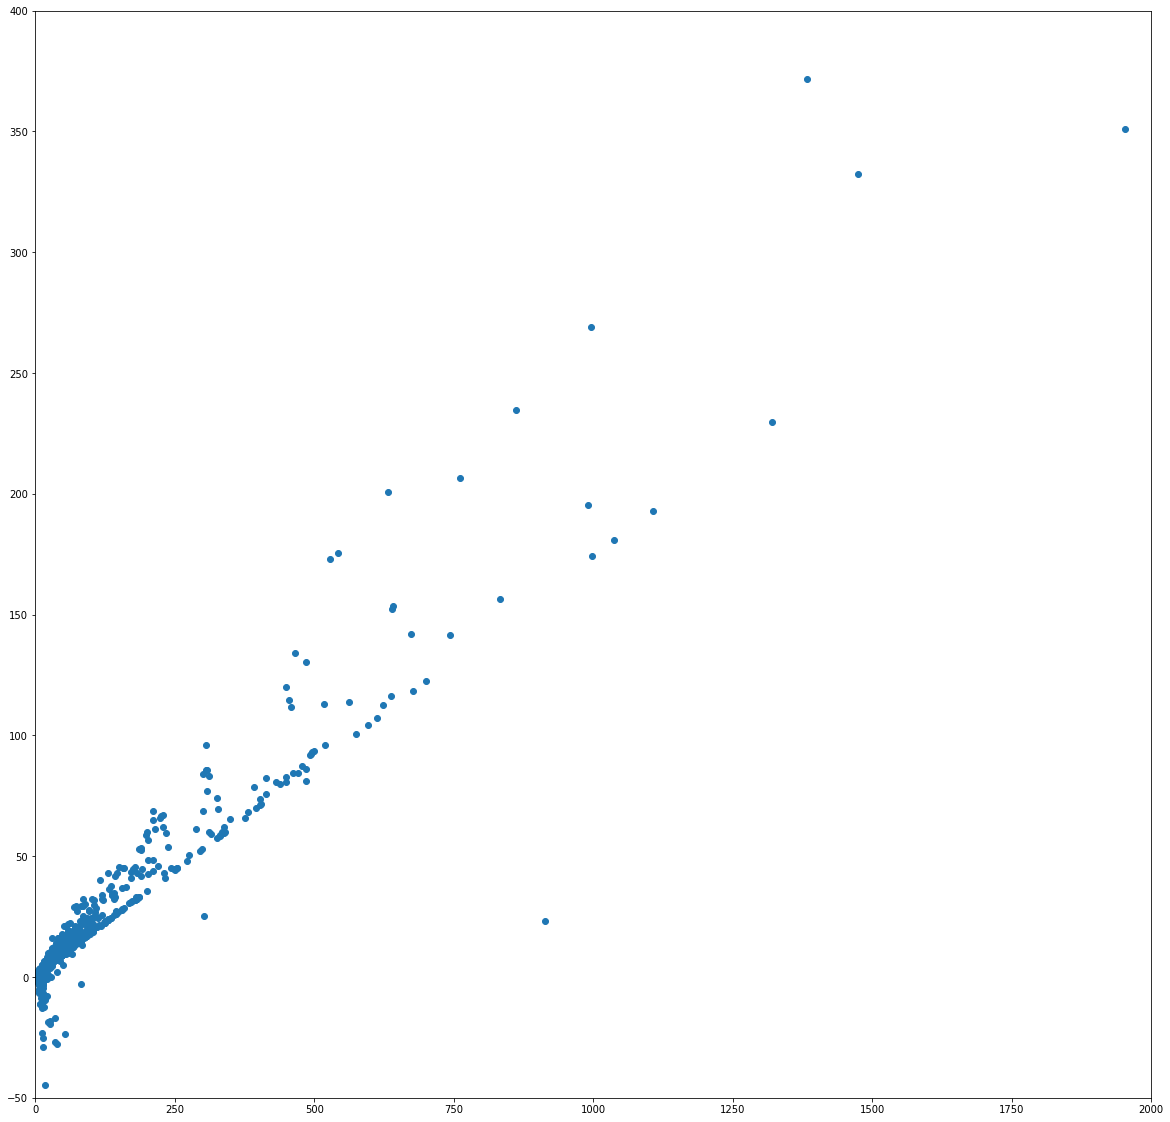

In [19]:
import matplotlib.pyplot as plt

plt_contagem_simples = plt.figure(figsize=(20,20))
plt.scatter(contagem_reduzida[:, 0], contagem_reduzida[:, 1])
plt.xlim(0, 2000)
plt.ylim(-50, 400)

(0.0, 20.0)

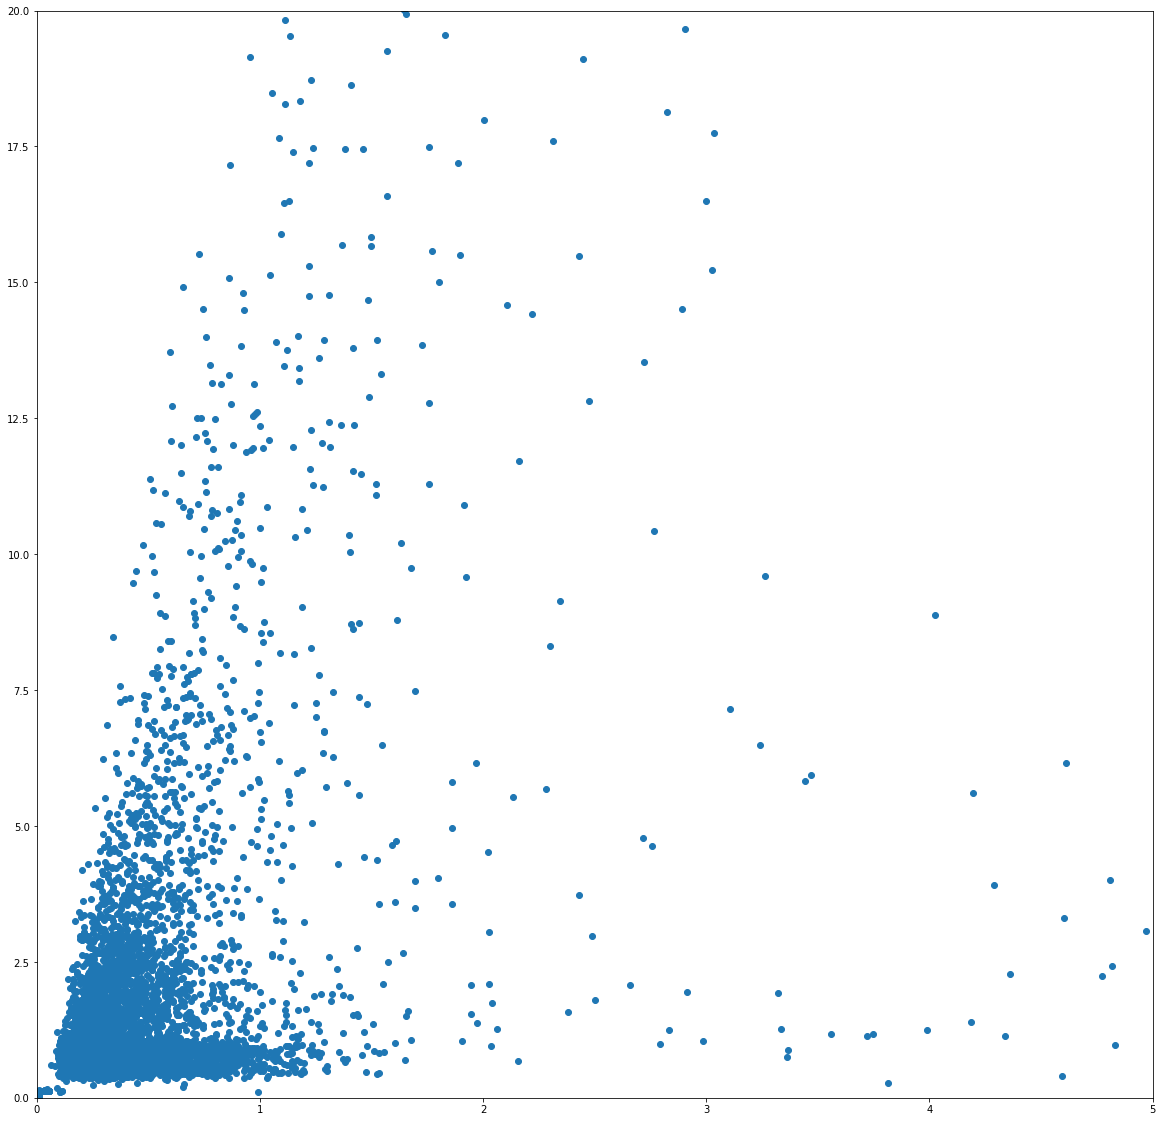

In [20]:
plt_contagem_normalizada = plt.figure(figsize=(20,20))
plt.scatter(contagem_normalizada_reduzida[:, 0], contagem_normalizada_reduzida[:, 1])
plt.xlim(0, 5)
plt.ylim(0, 20)

(-0.4, 0.1)

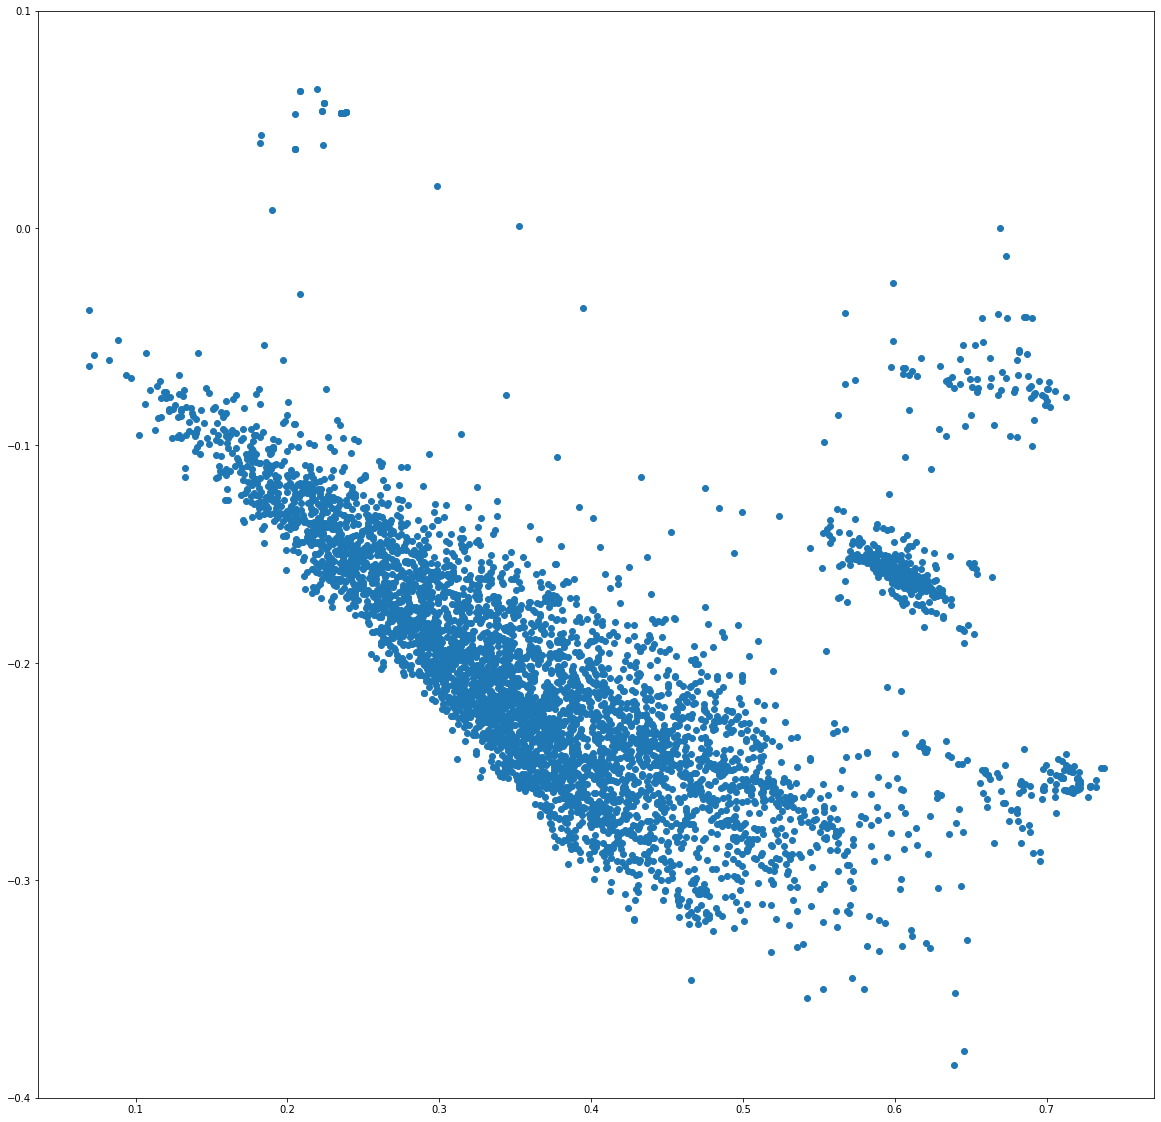

In [21]:
plt_tfidf = plt.figure(figsize=(20,20))
plt.scatter(tfidf_reduzido[:, 0], tfidf_reduzido[:, 1])
plt.ylim(-0.4, 0.1)

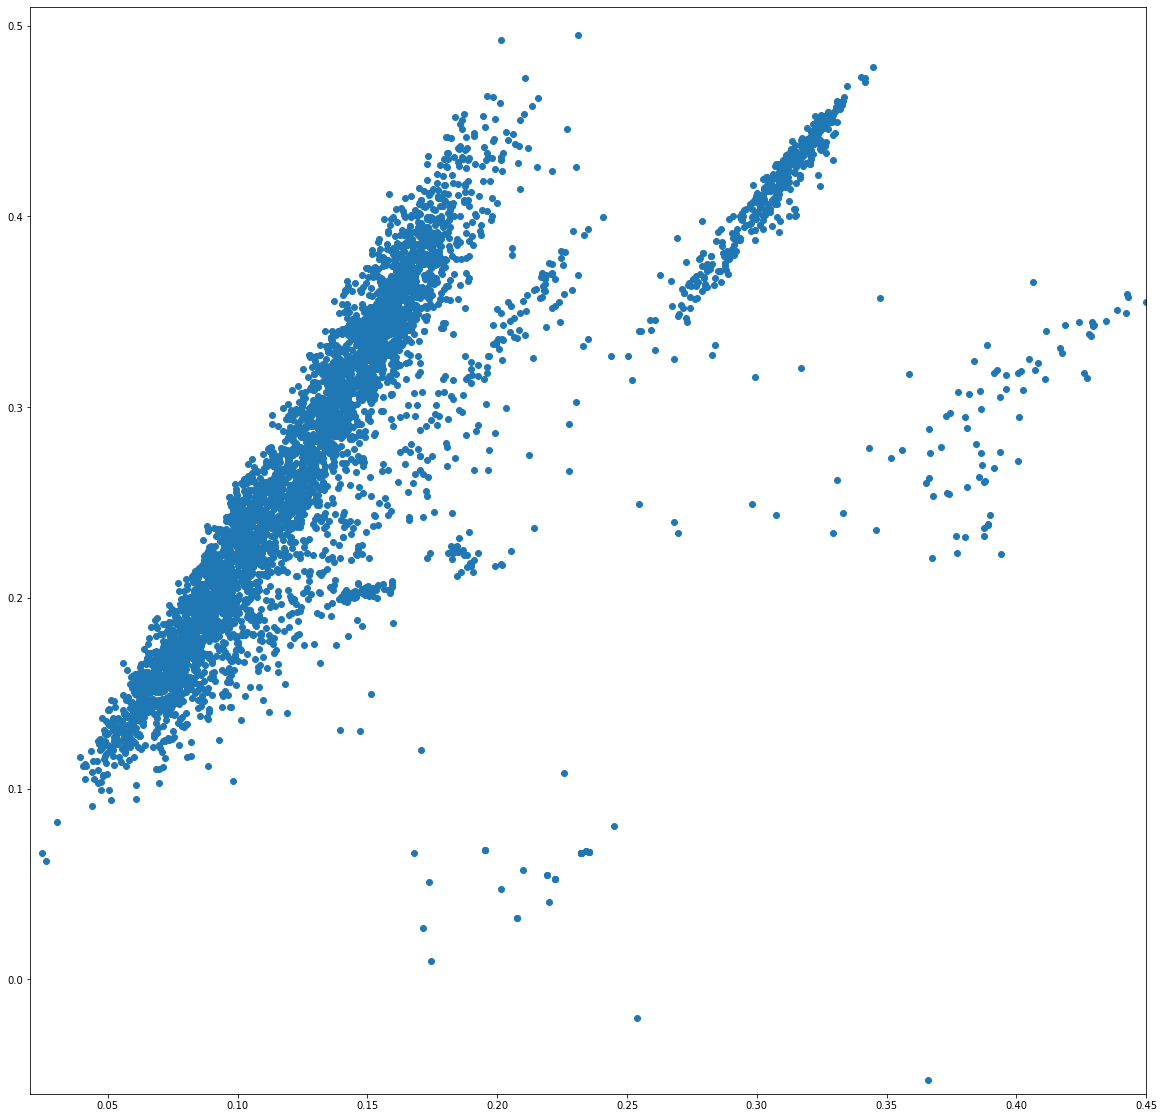

In [57]:
plt.figure(figsize=(20,20))
plt_tfidf_normalizado = plt.scatter(tfidf_normalizado_reduzido[:, 0], tfidf_normalizado_reduzido[:, 1])
plt.xlim(0.02, 0.45)
plt.ylim(-0.06, 0.51)

O plot da contagem simples (normalizada ou não) não parece mostrar clusters claros, embora isole bastante outliers, não mostrados no plot. 

Já as representações TF-IDF parecem mostrar clusters em 2D, ainda que a renteção de variância seja próxima de 15%. É provável que, com um número de dimensões maiores, a separação destes clusters seja muito mais clara. Tanto pelo aumento de dimensões (quanto mais dimensões mais esparsa é a geometria) quanto pelo aumento de variância explicada - consigo capturar melhorar a variância dos dados.

No plot de TF-IDF sem a normalização logaritmica, os clusters parecem mais circulares e portanto k-Means parece razoável. Já no plot do TF-IDF normalizado, a relação entre os clusters parece ser mais linear, sugerindo o uso de outro algoritmo de clusterização, como DBSCAN ou Gaussian Mixture. Você pode ter uma intuição sobre os diferentes tipos de algoritmos de clusterização na [documentação do Sklearn](https://scikit-learn.org/stable/modules/clustering.html).

## Clusterizando

A ideia então é clusterizar (pra ver se os clusters das categorias são descobertos a partir de nossa representação) e visualizar a efetividade destes clusters nos plots acima. 

Vou clusterizar as representações com k-Means, DBSCAN e Gaussian Mixture, como sugerido acima. Temos 8 categorias, 

### K-Means clustering:

K-Means é um algoritmo de agrupamento (clustering) que calcula os centros de cada grupo (cluster) e atribui cada dado ao centro mais próximo. Em seguida, ele recalcula o centro de cada grupo como a média dos pontos daquele grupo. Tendo os novos centros, ele calcula novamente o pertencimento de cada ponto aos centros do grupo. Este processo segue até que o algoritmo convirja ou até um número de iterações máximas (300 no caso do Sklearn). 

Os centros inicias (os primeiros centros escolhidos pelo algoritmo) são aleatórios, de forma que cada utilização do algoritmo num mesmo conjunto de dados pode sugerir grupos diferentes. O ideal é rodar o algoritmo algumas vezes e determinar qual foi a melhor versão do algoritmo. Isto é feito no Sklearn através do parâmetro n_init. Neste caso, vamos rodar o algoritmo 50 vezes a função nos retorna a melhor versão. Como é escolhida esta maior versão? Por uma medida chamada inércia. A inércia é a soma (do quadrado) da distância de cada ponto ao seu centro. Ou seja, neste algoritmo estamos minimizando a distância de cada ponto ao centro do seu grupo.

Pra uma análise um pouco mais fiel ao que de fato acontece no algoritmo, recomendo a aula sobre Unsupervised Learning do famoso curso de Machine Learning no Coursera, por Andrew Ng.

Note que estamos utilizando a representação completa de cada texto e não a representação reduzida. A representação reduzida perde muita informação sobre os dados. Só utilizamos ela pra visualizar e ter uma intuição a partir da visualização. Pra agrupar nossos dados, queremos utilizar toda informação disponível e portanto utilizamos toda a representação.

In [30]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture


km_contagem_simples = KMeans(n_clusters=8, n_init=50)
km_contagem_simples.fit(representacao_contagem)
print(f'Inercia da representacao com contagem simples dos termos: {km_contagem_simples.inertia_}')

leis["cluster_contagem"] = km_contagem_simples.labels_
leis.head()

Inercia da representacao com contagem simples dos termos: 11008986.590519955


categoria                                              texto  \
0  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   

                                         texto_limpo  cluster_contagem  \
0  prefeito municipal feira santana estado bahia ...                 0   
1  prefeito municipal feira santana estado bahia ...                 7   
2  prefeito municipal feira santana estado bahia ...                 0   
3  prefeito municipal feira santana estado bahia ...                 0   
4  prefeito municipal feira santana estado bahia ...                 0   

   cluster_contagem_normalizada  
0                             6  
1                             6  
2                             6  
3                             6  
4                             6

In [31]:
km_contagem_normalizada = KMeans(n_clusters=8, n_init=50)
km_contagem_normalizada.fit(contagem_normalizada)
print(f'Inercia da representacao com contagem normalizada dos termos: {km_contagem_normalizada.inertia_}')

leis["cluster_contagem_normalizada"] = km_contagem_normalizada.labels_
leis.head()

Inercia da representacao com contagem normalizada dos termos: 142001274.61788762


categoria                                              texto  \
0  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   

                                         texto_limpo  cluster_contagem  \
0  prefeito municipal feira santana estado bahia ...                 0   
1  prefeito municipal feira santana estado bahia ...                 7   
2  prefeito municipal feira santana estado bahia ...                 0   
3  prefeito municipal feira santana estado bahia ...                 0   
4  prefeito municipal feira santana estado bahia ...                 0   

   cluster_contagem_normalizada  
0                             4  
1                             4  
2                             4  
3                             4  
4                             4

In [32]:
km_tfidf = KMeans(n_clusters=8, n_init=50)
km_tfidf.fit(representacao_tfidf)
print(f'Inercia da representacao com TF-IDF: {km_tfidf.inertia_}')

leis["cluster_tfidf"] = km_tfidf.labels_
leis.head()

Inercia da representacao com contagem simples dos termos: 3637.362908732243


categoria                                              texto  \
0  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   

                                         texto_limpo  cluster_contagem  \
0  prefeito municipal feira santana estado bahia ...                 0   
1  prefeito municipal feira santana estado bahia ...                 7   
2  prefeito municipal feira santana estado bahia ...                 0   
3  prefeito municipal feira santana estado bahia ...                 0   
4  prefeito municipal feira santana estado bahia ...                 0   

   cluster_contagem_normalizada  cluster_tfidf  
0                             4              7  
1                             4              0  
2                             4              7  
3                             4              0  
4                             4              7

In [33]:
km_tfidf_normalizado = KMeans(n_clusters=8, n_init=50)
km_tfidf_normalizado.fit(tfidf_normalizado)
print(f'Inercia da representacao com TF-IDF normalizado: {km_tfidf_normalizado.inertia_}')

leis["cluster_tfidf_normalizado"] = km_tfidf_normalizado.labels_
leis.head()

Inercia da representacao com TF-IDF normalizado: 4139.634692321204


categoria                                              texto  \
0  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   

                                         texto_limpo  cluster_contagem  \
0  prefeito municipal feira santana estado bahia ...                 0   
1  prefeito municipal feira santana estado bahia ...                 7   
2  prefeito municipal feira santana estado bahia ...                 0   
3  prefeito municipal feira santana estado bahia ...                 0   
4  prefeito municipal feira santana estado bahia ...                 0   

   cluster_contagem_normalizada  cluster_tfidf  cluster_tfidf_normalizado  
0                             4              7                          4  
1                             4              0                          2  
2                             4              7                          4  
3                             4              0                          2  
4                             4              7                          4

Somente pelos valores de inércia já dá pra ver que a representação por TF-IDF se sai muito melhor (uma ordem de magnitude melhor) que a representação pela contagem simples, mesmo a normalizada.

Outra característica a priori é que as representações normalizadas possuem uma inércia maior do que as não normalizadas. O que isso significa? Pense em duas dimensões

### Visualizando os clusters

Ok, agora que clusterizamos, vamos tentar obter uma representação visual sobre a qualidade de nossos clusters. Temos o cluster associado de cada lei no nosso DataFrame leis. Vamos colorir cada exemplo com uma cor correspondente. Primeiro, criando uma correspondência entre cada número de cluster e uma cor. Em seguida, colorindo na imagem acima.

In [66]:
# Você pode achar o nome das cores aqui: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
dicionario_cores = {0: "tab:blue", 1:"tab:orange", 2:"tab:green", 3:"tab:red", 4:"tab:purple", 5:"tab:olive", 6:"tab:grey", 7:"tab:cyan"}
def aplica_cor_cluster(num):
    return dicionario_cores[num]

leis["cores_contagem"] = leis["cluster_contagem"].apply(aplica_cor_cluster)
leis["cores_contagem_normalizada"] = leis["cluster_contagem_normalizada"].apply(aplica_cor_cluster)
leis["cores_tfidf"] = leis["cluster_tfidf"].apply(aplica_cor_cluster)
leis["cores_tfidf_normalizado"] = leis["cluster_tfidf_normalizado"].apply(aplica_cor_cluster)
leis.head()

categoria                                              texto  \
0  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
1  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
2  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
3  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   
4  Decretos  O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta...   

                                         texto_limpo  cluster_contagem  \
0  prefeito municipal feira santana estado bahia ...                 0   
1  prefeito municipal feira santana estado bahia ...                 7   
2  prefeito municipal feira santana estado bahia ...                 0   
3  prefeito municipal feira santana estado bahia ...                 0   
4  prefeito municipal feira santana estado bahia ...                 0   

   cluster_contagem_normalizada  cluster_tfidf  cluster_tfidf_normalizado  \
0                             4              7                          4   
1                             4              0                          2   
2                             4              7                          4   
3                             4              0                          2   
4                             4              7                          4   

  cores_contagem cores_contagem_normalizada cores_tfidf  \
0       tab:blue                 tab:purple    tab:cyan   
1       tab:cyan                 tab:purple    tab:blue   
2       tab:blue                 tab:purple    tab:cyan   
3       tab:blue                 tab:purple    tab:blue   
4       tab:blue                 tab:purple    tab:cyan   

  cores_tfidf_normalizado  
0              tab:purple  
1               tab:green  
2              tab:purple  
3               tab:green  
4              tab:purple

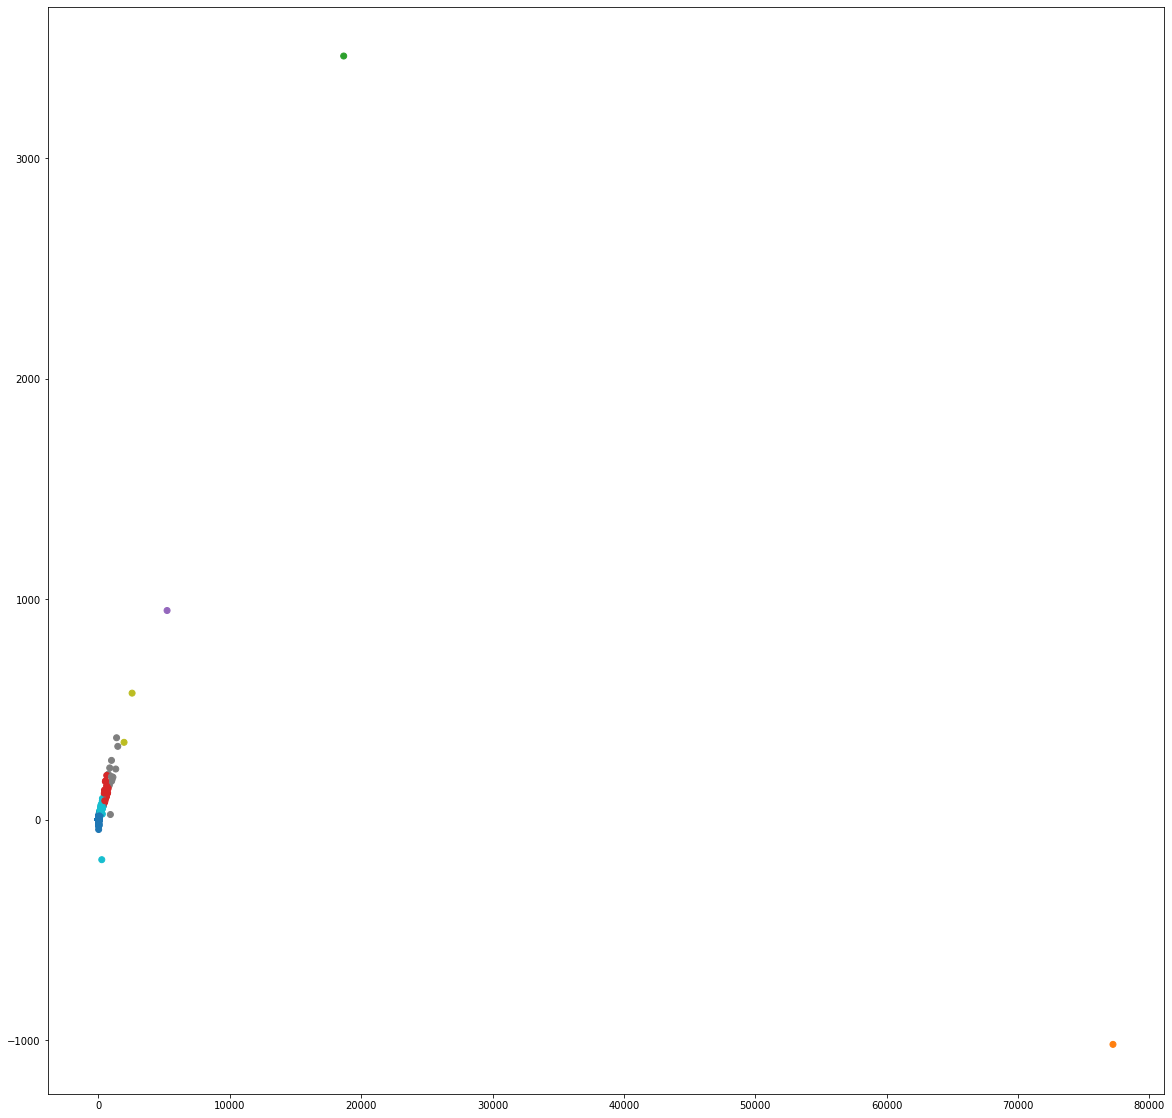

In [70]:
plt.figure(figsize=(20,20))
plt.scatter(contagem_reduzida[:, 0], contagem_reduzida[:, 1], c=leis["cores_contagem"])
plt.xlim(0, 2000)
plt.ylim(-50, 400)

(0.0, 20.0)

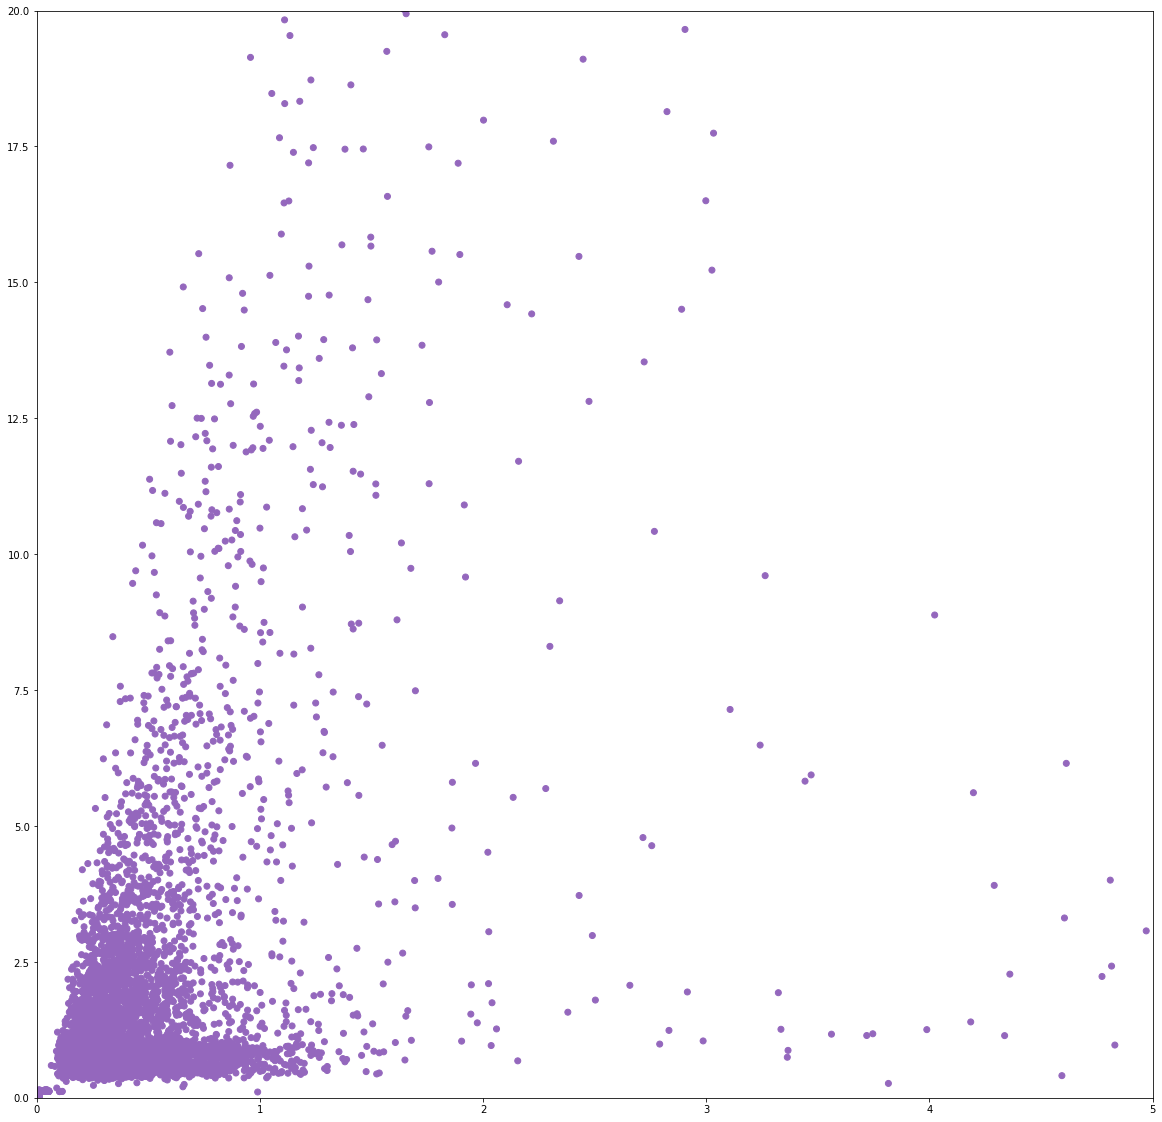

In [71]:
plt_contagem_normalizada = plt.figure(figsize=(20,20))
plt.scatter(contagem_normalizada_reduzida[:, 0], contagem_normalizada_reduzida[:, 1], c=leis["cores_contagem_normalizada"])
plt.xlim(0, 5)
plt.ylim(0, 20)

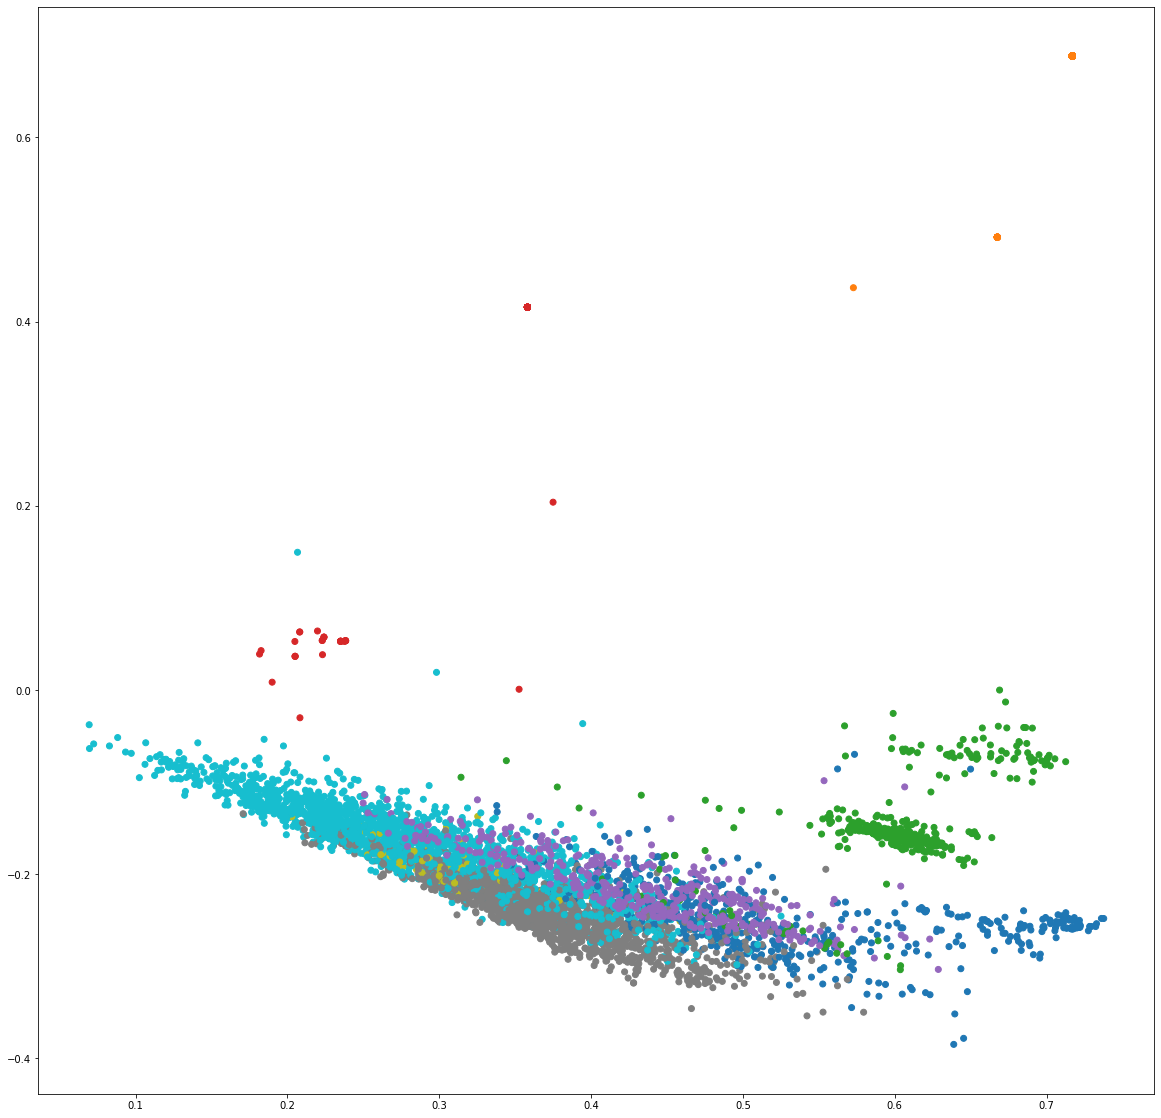

In [75]:
plt_tfidf = plt.figure(figsize=(20,20))
plt.scatter(tfidf_reduzido[:, 0], tfidf_reduzido[:, 1], c=leis["cores_tfidf"])
plt.ylim(-0.4, 0.1)

(-0.06, 0.51)

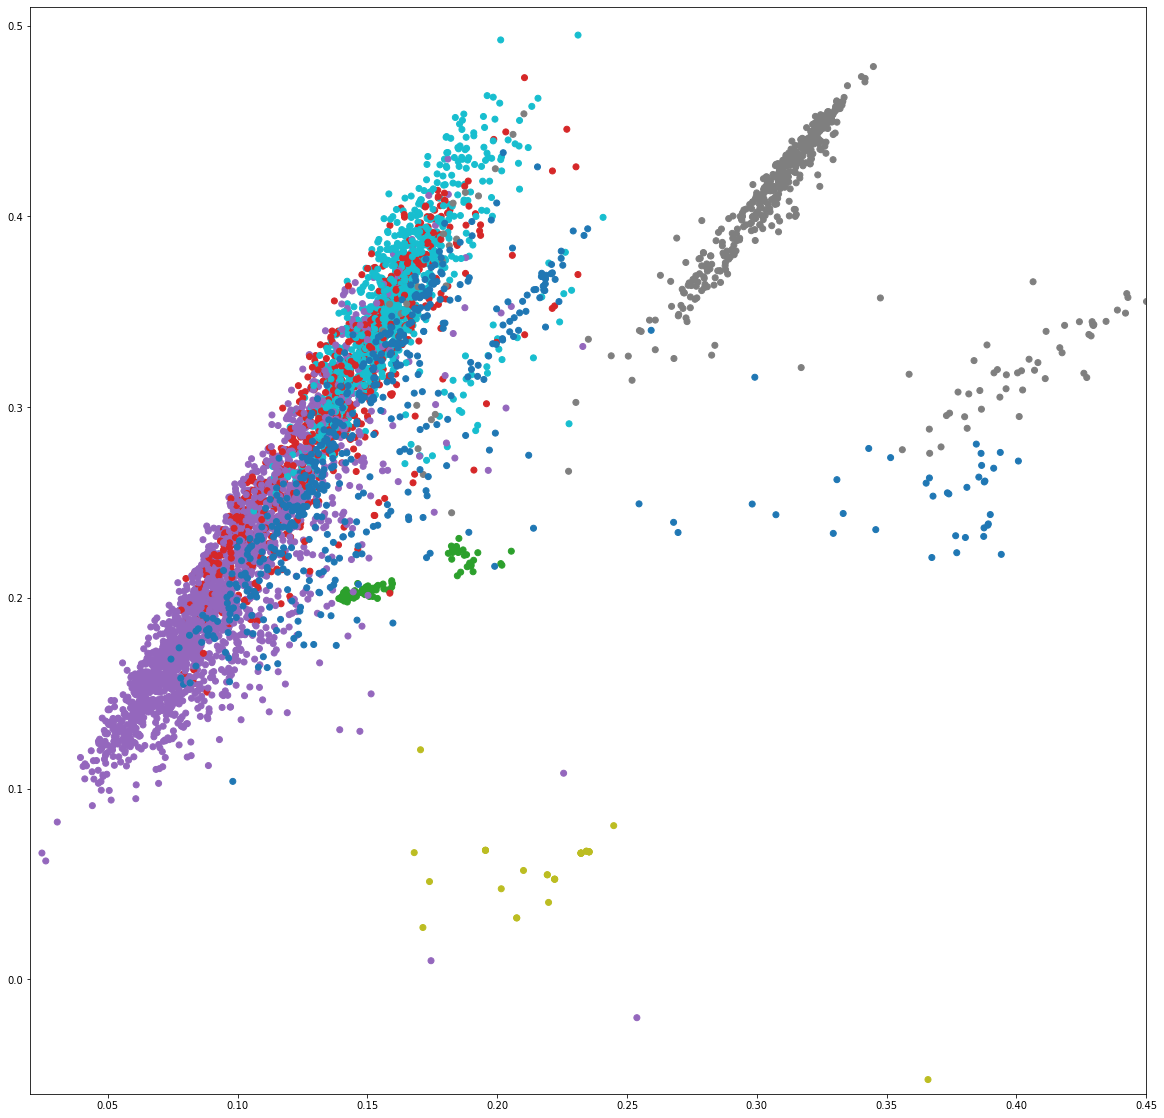

In [78]:
plt.figure(figsize=(20,20))
plt_tfidf_normalizado = plt.scatter(tfidf_normalizado_reduzido[:, 0], tfidf_normalizado_reduzido[:, 1], c=leis["cores_tfidf_normalizado"])
plt.xlim(0.02, 0.45)
plt.ylim(-0.06, 0.51)